In [1]:
import os
from kid_readout.measurement import core, legacy, multiple
from kid_readout.measurement.io import nc, npy, readoutnc
from kid_readout.analysis.resonator import plot_resonator

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
nc_filename = '/data/readout/2015-05-11_150346_compressor_noise_60_s.nc'
rnc = readoutnc.ReadoutNetCDF(nc_filename)
on_index = 0
off_index = 1

In [3]:
tg_on = rnc.timestreams[on_index]

In [4]:
order = tg_on.measurement_freq.argsort()
order

array([ 0,  1,  2,  3,  4,  5, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6])

In [5]:
%time sa = legacy.streamarray_from_rnc(rnc, on_index)

CPU times: user 123 ms, sys: 76 ms, total: 199 ms
Wall time: 198 ms


In [6]:
%time sa.s21.shape

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


(16, 1048576)

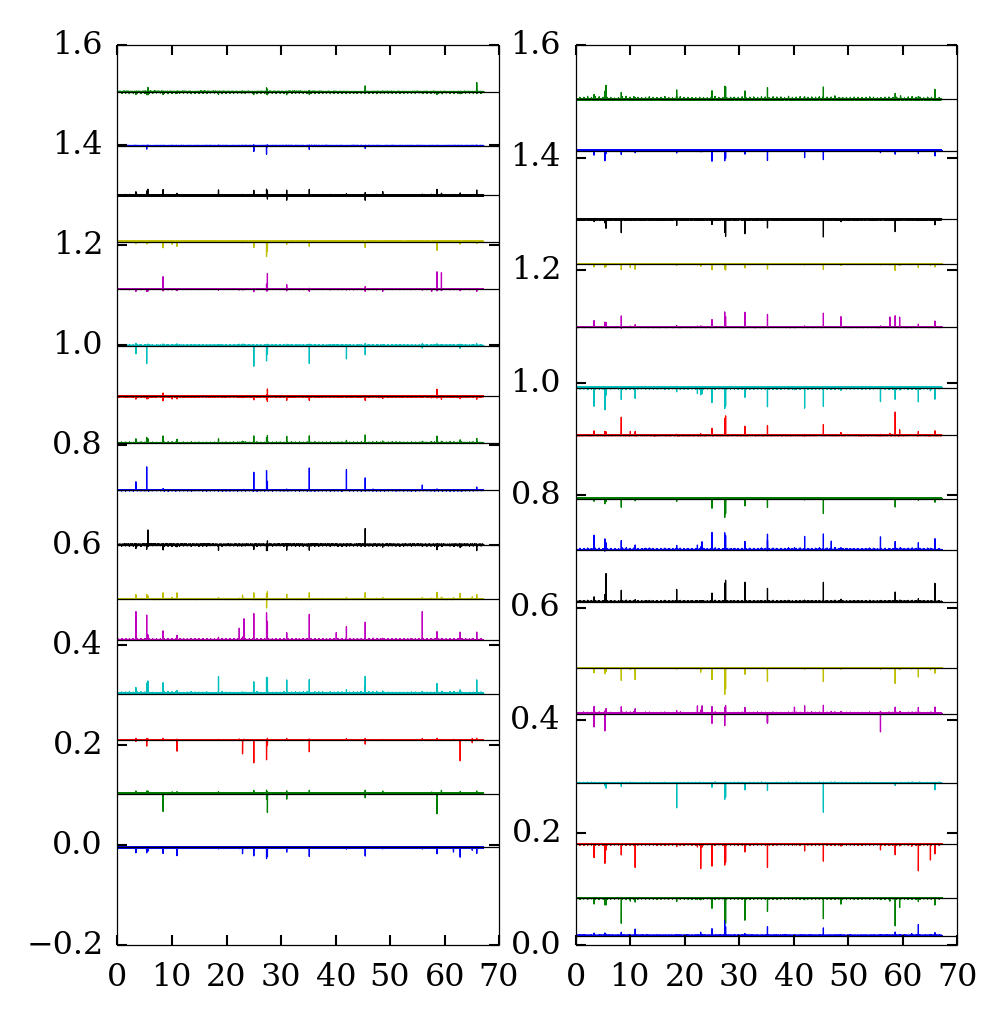

In [7]:
fig, (real_ax, imag_ax) = plt.subplots(ncols=2, figsize=(4, 4))
for n in range(sa.frequency.size):
    sn = sa.stream(n)
    real_ax.plot(sn.epoch - sn.epoch[0], 0.1 * n + sn.s21.real)
    real_ax.axhline(sn.s21_mean.real + 0.1 * n, color='k')
    imag_ax.plot(sn.epoch - sn.epoch[0], 0.1 * n + sn.s21.imag)
    imag_ax.axhline(sn.s21_mean.imag + 0.1 * n, color='k')

# Timing read/write

In [8]:
sa.s21.nbytes / 2**20

256.0

In [9]:
node_path = 'streamarray'

In [10]:
directory = '/home/flanigan/temp/nc'
nc_filename = 'test.nc'
nc_root_path = os.path.join(directory, nc_filename)
try:
    os.remove(nc_root_path)
except OSError:
    print("Not deleted: {}".format(nc_root_path))

In [11]:
nc_io = nc.IO(nc_root_path)
%time core.write(sa, nc_io, node_path)
nc_io.close()

CPU times: user 32 ms, sys: 141 ms, total: 173 ms
Wall time: 172 ms


In [12]:
nc_io = nc.IO(nc_root_path)
%timeit core.read(nc_io, node_path)

10 loops, best of 3: 81.8 ms per loop


In [13]:
!rm -r /home/flanigan/temp/npy

In [14]:
npy_root_path = '/home/flanigan/temp/npy'
npy_io = npy.IO(npy_root_path)
%time core.write(sa, npy_io, node_path)

CPU times: user 999 µs, sys: 130 ms, total: 131 ms
Wall time: 132 ms


In [15]:
%timeit core.read(npy_io, node_path)

10 loops, best of 3: 54 ms per loop
